In [1]:
import numpy as np
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df= pd.read_csv('spam2.csv')

In [3]:
df.sample(5)

,v1,v2
746,True,"Saffron is chiefly cultivated in Spain, France..."
488,True,But Taranâ€¦was it possible to love a man she ...
367,True,Quinine has considerable powers as an .antisep...
975,True,"As its popularity grew, however, Hollyoaks beg..."
716,True,In the north wall is situated the famous Kashm...


In [4]:
df.shape

(1911, 2)

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [6]:
df['v1']=encoder.fit_transform(df['v1'])

In [7]:
df.head()

,v1,v2
0,1,But what has the bomb to do with what I wish y...
1,1,The bomb was approached with caution.
2,1,"The road was ripped open, as if by a massive b..."
3,1,He wasn't about to believe Death until he saw ...
4,1,Colin finds an unexploded bomb in the Leisure ...


In [8]:
df.duplicated().sum()

0

In [9]:
df['v1'].value_counts()

1    1091
0     820
Name: v1, dtype: int64

In [10]:
!pip install nltk

You should consider upgrading via the 'C:\Users\Mansi Jasoria\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Mansi
[nltk_data]     Jasoria\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
df['num_characters']=df['v2'].apply(len)

In [13]:
df.head()

,v1,v2,num_characters
0,1,But what has the bomb to do with what I wish y...,58
1,1,The bomb was approached with caution.,37
2,1,"The road was ripped open, as if by a massive b...",50
3,1,He wasn't about to believe Death until he saw ...,217
4,1,Colin finds an unexploded bomb in the Leisure ...,53


In [14]:
df['num_words']=df['v2'].apply(lambda x:len(nltk.word_tokenize(x)))

In [15]:
df.head()

,v1,v2,num_characters,num_words
0,1,But what has the bomb to do with what I wish y...,58,15
1,1,The bomb was approached with caution.,37,7
2,1,"The road was ripped open, as if by a massive b...",50,13
3,1,He wasn't about to believe Death until he saw ...,217,47
4,1,Colin finds an unexploded bomb in the Leisure ...,53,10


In [16]:
df['num_sentences']=df['v2'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [17]:
df.head()

,v1,v2,num_characters,num_words,num_sentences
0,1,But what has the bomb to do with what I wish y...,58,15,1
1,1,The bomb was approached with caution.,37,7,1
2,1,"The road was ripped open, as if by a massive b...",50,13,1
3,1,He wasn't about to believe Death until he saw ...,217,47,2
4,1,Colin finds an unexploded bomb in the Leisure ...,53,10,1


In [18]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
def transform_text(v2):
    text = v2.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
        
    return " ".join(y)

In [27]:
transform_text('Hi i m loving how are you mansi')

'hi love mansi'

In [28]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [29]:
df['transformed_text']=df['v2'].apply(transform_text)

In [30]:
df.head()

,v1,v2,num_characters,num_words,num_sentences,transformed_text
0,1,But what has the bomb to do with what I wish y...,58,15,1,bomb wish write
1,1,The bomb was approached with caution.,37,7,1,bomb approach caution
2,1,"The road was ripped open, as if by a massive b...",50,13,1,road rip open massiv bomb
3,1,He wasn't about to believe Death until he saw ...,217,47,2,believ death saw kati minut midnight fourth da...
4,1,Colin finds an unexploded bomb in the Leisure ...,53,10,1,colin find unexplod bomb leisur center


In [31]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [32]:
spam_wc = wc.generate(df[df['v1'] ==1]['transformed_text'].str.cat(sep=""))

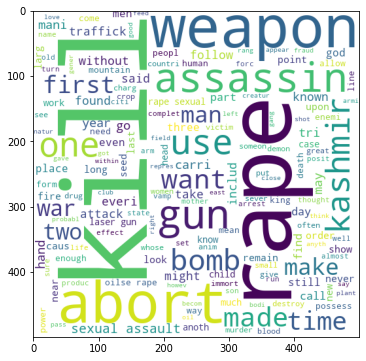

In [33]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [34]:
spam_wc = wc.generate(df[df['v1'] ==0]['transformed_text'].str.cat(sep=""))

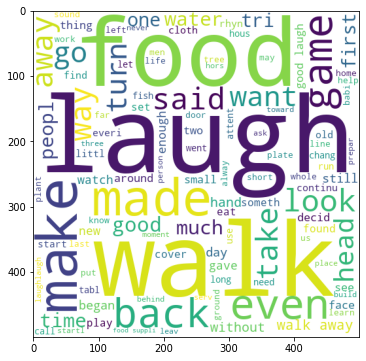

In [35]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [36]:
spam_corpus=[]
for msg in df[df['v1']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
    


In [37]:
len(spam_corpus)

11852

In [38]:
from collections import Counter
Counter(spam_corpus).most_common(5)

[('kill', 264),
 ('rape', 179),
 ('assassin', 156),
 ('gun', 137),
 ('weapon', 122)]

In [39]:
ham_corpus=[]
for msg in df[df['v1']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [40]:
len(ham_corpus)

7162

In [41]:
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

sklearn: 1.0.2


In [42]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf = TfidfVectorizer()

In [43]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [44]:
X.shape

(1911, 5288)

In [45]:
y = df['v1'].values

In [46]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [49]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [50]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [51]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.7806788511749347
[[127  55]
 [ 29 172]]
0.7577092511013216


In [52]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9556135770234987
[[167  15]
 [  2 199]]
0.9299065420560748


In [53]:
bnb.fit(X_train,y_train)
y_pred3=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.7806788511749347
[[127  55]
 [ 29 172]]
0.7577092511013216


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [55]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [56]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt
}

In [57]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [58]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9973890339425587, 0.995049504950495)

In [59]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9973890339425587
Precision -  0.995049504950495
For  KN
Accuracy -  0.8642297650130548
Precision -  0.8743718592964824
For  NB
Accuracy -  0.9556135770234987
Precision -  0.9299065420560748
For  DT
Accuracy -  0.9973890339425587
Precision -  1.0
For  LR
Accuracy -  0.9973890339425587
Precision -  0.995049504950495
For  RF
Accuracy -  1.0
Precision -  1.0
For  AdaBoost
Accuracy -  1.0
Precision -  1.0
For  BgC
Accuracy -  1.0
Precision -  1.0
For  ETC
Accuracy -  0.9869451697127938
Precision -  0.9851485148514851
For  GBDT
Accuracy -  0.9973890339425587
Precision -  1.0


In [61]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [62]:
performance_df

,Algorithm,Accuracy,Precision
3,DT,0.997389,1.000000
5,RF,1.000000,1.000000
6,AdaBoost,1.000000,1.000000
7,BgC,1.000000,1.000000
9,GBDT,0.997389,1.000000
0,SVC,0.997389,0.995050
4,LR,0.997389,0.995050
8,ETC,0.986945,0.985149
2,NB,0.955614,0.929907
1,KN,0.864230,0.874372
